In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('food_order.csv')
df.shape

(1898, 9)

In [3]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
df1 = df.drop(['order_id','customer_id'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        1898 non-null   object 
 1   cuisine_type           1898 non-null   object 
 2   cost_of_the_order      1898 non-null   float64
 3   day_of_the_week        1898 non-null   object 
 4   rating                 1898 non-null   object 
 5   food_preparation_time  1898 non-null   int64  
 6   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 103.9+ KB


In [5]:
df1.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [8]:
df1.rating.replace(to_replace=['Not given'],value=pd.NA,inplace=True)

In [10]:
df1.rating.value_counts(dropna=False)

<NA>    736
5       588
4       386
3       188
Name: rating, dtype: int64

In [14]:
df1.dropna(inplace=True)
df1.shape

(1162, 7)

In [25]:
class_dis=df1.rating.value_counts().sort_index(ascending=True).values
class_dis

array([188, 386, 588], dtype=int64)

In [26]:
class_names = df1.rating.unique().tolist()
class_names = sorted(class_names)
class_names

['3', '4', '5']

In [27]:
# Pie Plot
fig = px.pie(names=class_names, values=class_dis, title="Training Class Distribution", hole=0.2)
fig.update_layout({'title':{'x':0.5}})
fig.show()

fig = px.bar(x=class_names, y=class_dis, color=class_names)
fig.show()

In [15]:
df1.rating = df1.rating.astype('category')

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   restaurant_name        1162 non-null   object  
 1   cuisine_type           1162 non-null   object  
 2   cost_of_the_order      1162 non-null   float64 
 3   day_of_the_week        1162 non-null   object  
 4   rating                 1162 non-null   category
 5   food_preparation_time  1162 non-null   int64   
 6   delivery_time          1162 non-null   int64   
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 64.8+ KB


In [17]:
df1.drop(['restaurant_name'],axis=1,inplace=True)

In [18]:
df1.shape

(1162, 6)

In [19]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 2 categorical variables

The categorical variables : ['cuisine_type', 'day_of_the_week']


In [20]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 4 numerical variables

The numerical variables : ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']


In [22]:
df1[categorical].nunique()

cuisine_type       14
day_of_the_week     2
dtype: int64

In [23]:
df1.cuisine_type.value_counts()

American          368
Japanese          273
Italian           172
Chinese           133
Indian             50
Mexican            48
Middle Eastern     34
Mediterranean      32
Southern           13
French             10
Thai                9
Korean              9
Spanish             6
Vietnamese          5
Name: cuisine_type, dtype: int64

In [29]:
df2 = pd.get_dummies(data = df1, columns=categorical, drop_first=True)
df2.shape

(1162, 18)

In [30]:
df2.head()

,cost_of_the_order,rating,food_preparation_time,delivery_time,cuisine_type_Chinese,cuisine_type_French,cuisine_type_Indian,cuisine_type_Italian,cuisine_type_Japanese,cuisine_type_Korean,cuisine_type_Mediterranean,cuisine_type_Mexican,cuisine_type_Middle Eastern,cuisine_type_Southern,cuisine_type_Spanish,cuisine_type_Thai,cuisine_type_Vietnamese,day_of_the_week_Weekend
2,12.23,5,23,28,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,29.20,3,25,15,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,11.59,4,25,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,25.22,3,20,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,5.97,3,33,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Feature Engineering

In [31]:
X = df2.drop(['rating'],axis=1)
y = df2.rating

X.shape, y.shape

((1162, 17), (1162,))

In [33]:
y.value_counts()

5    588
4    386
3    188
Name: rating, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [35]:
y.value_counts()

3    588
4    588
5    588
Name: rating, dtype: int64

In [36]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1411, 17), (353, 17), (1411,), (353,))

In [37]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [38]:
from math import sqrt
print(sqrt(X_train.shape[1]))

4.123105625617661


In [39]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

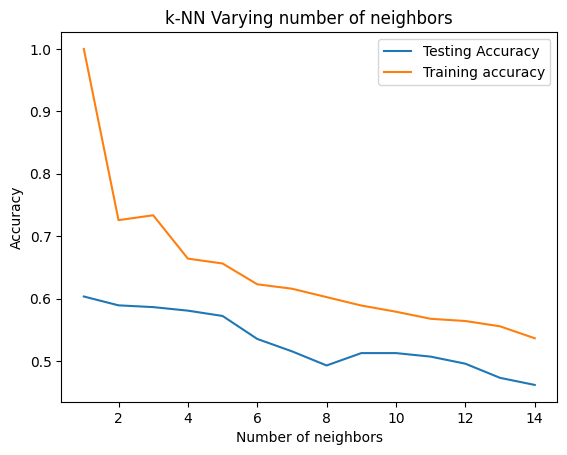

In [40]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=1,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 9 candidates, totalling 54 fits
Best Score:0.5641573506431061
Best Parameters: {'n_neighbors': 1}


In [43]:
y_pred = knn_cv.predict(X_test)

In [45]:
knn_accuracy = knn_cv.score(X_test, y_test)
# precision
knn_pre = precision_score(y_test, y_pred,average='weighted')
# recall
knn_rec = recall_score(y_test, y_pred,average='weighted')
print(knn_accuracy,knn_pre,knn_rec)

0.603399433427762 0.5973015186437465 0.603399433427762


Gridsearch RF

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [47]:
y_pred = clf.predict(X_test_RF)

In [48]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 0.5921


In [52]:
df1.corr(numeric_only=True)

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.035445,-0.075892
food_preparation_time,0.035445,1.000000,-0.008635
delivery_time,-0.075892,-0.008635,1.000000


This wasn't a synthetic dataset and there was no correlation. Hence, a poor accuracy!